In [31]:
import yfinance as yf   
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

from regras_de_negocio import *

plt.style.use("cyberpunk")


In [32]:
ticker = "BTC-USD"
dados = yf.download(ticker, auto_adjust=False)
dados = dados.dropna()
dados = dados.droplevel(1, axis=1)
dados

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2025-02-28,84373.007812,84373.007812,85036.320312,78248.914062,84705.625000,83610570576
2025-03-01,86031.914062,86031.914062,86522.304688,83794.234375,84373.867188,29190628396
2025-03-02,94248.351562,94248.351562,95043.437500,85040.210938,86036.257812,58398341092


Preparar e calcular dados importantes para o modelo

In [33]:
dados["media_maxima"] = dados.High.rolling(window=20).mean(20)
dados["media_minima"] = dados.Low.rolling(window=20).mean(20)
dados.head(30)

Price,Adj Close,Close,High,Low,Open,Volume,media_maxima,media_minima
Date,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,NaN,NaN
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,NaN,NaN
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,NaN,NaN
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,NaN,NaN
2014-09-22,402.152008,402.152008,406.915985,397.130005,399.100006,24127600,NaN,NaN
2014-09-23,435.790985,435.790985,441.557007,396.196991,402.092010,45099500,NaN,NaN
2014-09-24,423.204987,423.204987,436.112000,421.131989,435.751007,30627700,NaN,NaN
2014-09-25,411.574005,411.574005,423.519989,409.467987,423.156006,26814400,NaN,NaN


Gerar sinais de compra

In [34]:
dados["sinal_compra"] = 0
dados.sinal_compra = (dados.Close > dados.media_maxima).astype(int)
dados

Price,Adj Close,Close,High,Low,Open,Volume,media_maxima,media_minima,sinal_compra
Date,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,0
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,NaN,NaN,0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,NaN,NaN,0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,NaN,NaN,0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2025-02-28,84373.007812,84373.007812,85036.320312,78248.914062,84705.625000,83610570576,95887.094531,92541.878125,0
2025-03-01,86031.914062,86031.914062,86522.304688,83794.234375,84373.867188,29190628396,95346.945703,91994.326953,0
2025-03-02,94248.351562,94248.351562,95043.437500,85040.210938,86036.257812,58398341092,95182.456641,91480.295313,0


Gerar sinais de venda

In [35]:
dados["sinal_venda"] = 0
dados.sinal_venda = (dados.Close < dados.media_minima).astype(int)
dados

Price,Adj Close,Close,High,Low,Open,Volume,media_maxima,media_minima,sinal_compra,sinal_venda
Date,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,0,0
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,NaN,NaN,0,0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,NaN,NaN,0,0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,NaN,NaN,0,0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
2025-02-28,84373.007812,84373.007812,85036.320312,78248.914062,84705.625000,83610570576,95887.094531,92541.878125,0,1
2025-03-01,86031.914062,86031.914062,86522.304688,83794.234375,84373.867188,29190628396,95346.945703,91994.326953,0,1
2025-03-02,94248.351562,94248.351562,95043.437500,85040.210938,86036.257812,58398341092,95182.456641,91480.295313,0,0


Criar colunas necessárias para operacoes

In [36]:
dados["posicao"] = False
dados["trade"] = 0
dados["posicao_obs"] = ""
dados["retorno_modelo"] = 0.0

Gerar Operacoes

In [37]:
dados = gerar_posicao_e_trade_obs(dados, 'sinal_compra', 'sinal_venda', 'posicao', 'trade', 'posicao_obs')


Calcular retorno de todos os trades e retorno da base de comparacao

In [38]:
# retorno do modelo
dados = calcular_retorno_modelo(dados, 'Close', 'posicao_obs', 'retorno_modelo')

# retorno base de comparacao
dados["retorno"] = dados.Close.pct_change()


Gerar variaveis para plotagem dos dados

In [39]:
dados_retorno_modelo = (1 + dados.retorno_modelo).cumprod()-1
dados_retorno = (1 + dados.retorno).cumprod()-1

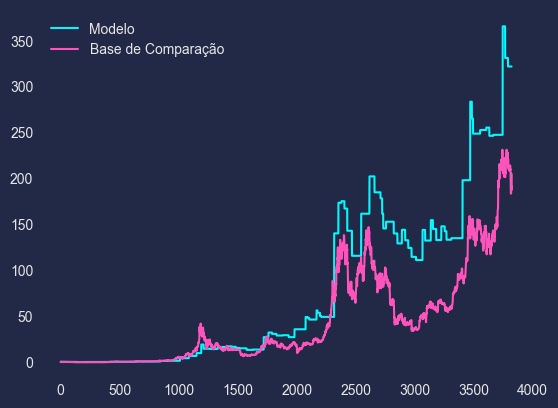

In [40]:
dados_retorno_modelo.plot(label = "Modelo")
dados_retorno.plot(label = "Base de Comparação")
plt.legend()
plt.grid()
plt.show()

Gerar comparativo em termos financeiros

In [41]:
quantia_inicial = 25

valor_final_acumulado_base = quantia_inicial * (1 + dados_retorno.iloc[-1])
valor_final_acumulado_modelo = quantia_inicial * (1 + dados_retorno_modelo.iloc[-1])

print(f"Valor final acumulado ao aplicar {quantia_inicial} reais na base de comparação: {valor_final_acumulado_base:.2f} reais")
print(f"Valor final acumulado ao aplicar {quantia_inicial} reais no modelo: {valor_final_acumulado_modelo:.2f} reais")


diferenca_percentual = ((valor_final_acumulado_modelo - valor_final_acumulado_base) / valor_final_acumulado_base) * 100

if valor_final_acumulado_modelo > valor_final_acumulado_base:
    print(f"O modelo teve um desempenho melhor que a base de comparação por {diferenca_percentual:.2f}%.")
else:
    print(f"A base de comparação teve um desempenho melhor que o modelo por {diferenca_percentual:.2f}%.")


Valor final acumulado ao aplicar 25 reais na base de comparação: 4803.28 reais
Valor final acumulado ao aplicar 25 reais no modelo: 8069.41 reais
O modelo teve um desempenho melhor que a base de comparação por 68.00%.
